1. Importing Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2. Loading the Dataset

In [ ]:
#We'll use TensorFlow's Keras API to load the CIFAR-10 dataset.

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


3. Data Preprocessing

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


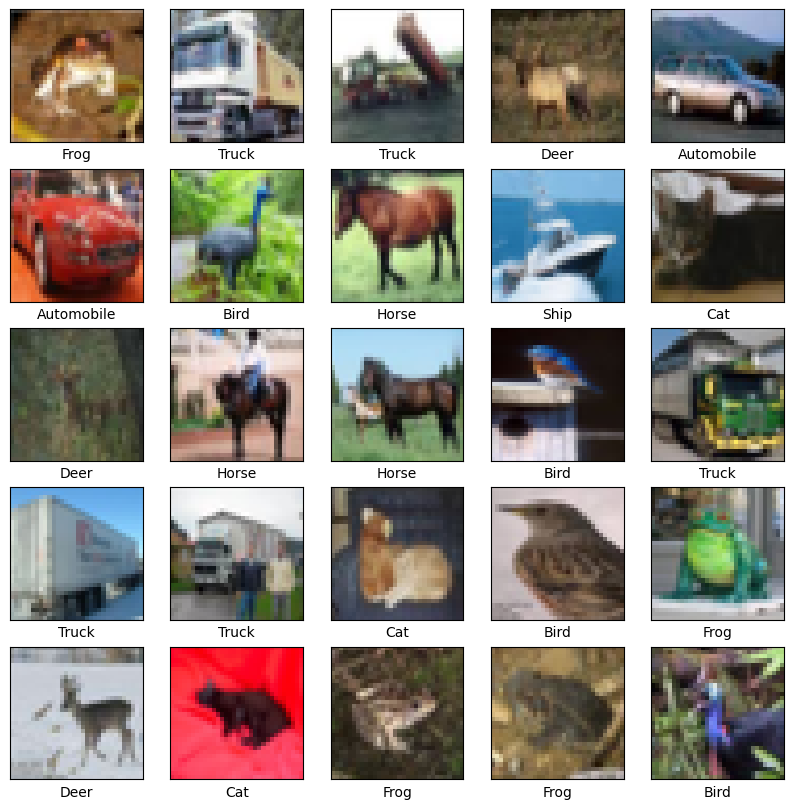

In [ ]:
#a. Data Exploration and Visualization
# Explore the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The labels are in a 2D array, so we need to index [0]
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#b. Data Normalization
#Normalize the pixel values to be between 0 and 1.

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#c. Splitting the Data
#Split the training data into training and validation sets.

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


4. Exploratory Data Analysis (EDA)

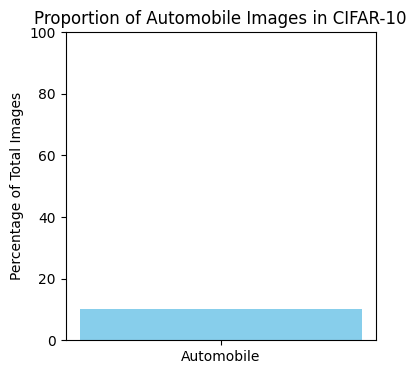

In [ ]:
#a. Class Distribution
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Combine training and testing labels
all_labels = np.concatenate((train_labels, test_labels))

# Find the index of the "Automobile" class
automobile_index = class_names.index('Automobile')

# Count the number of "Automobile" images
automobile_count = np.count_nonzero(all_labels == automobile_index)

# Get the total number of images
total_images = len(all_labels)

# Calculate the percentage
automobile_percentage = (automobile_count / total_images) * 100

# Create a bar plot for visualization
plt.figure(figsize=(4, 4))
plt.bar(['Automobile'], [automobile_percentage], color='skyblue')
plt.title('Proportion of Automobile Images in CIFAR-10')
plt.ylabel('Percentage of Total Images')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%

plt.show()

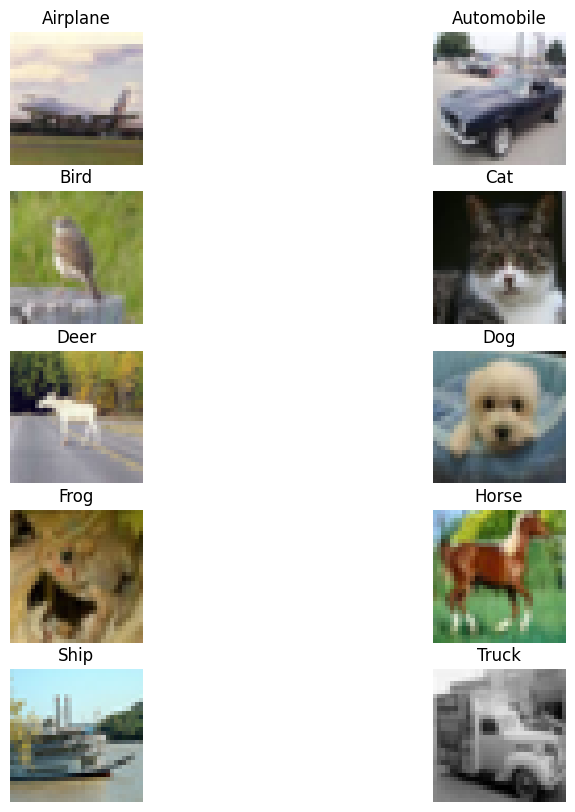

In [ ]:
#b. Sample Image Analysis
# Display a sample image from each class
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# ... (rest of the imports)

# Define class_names here, before it is used in the loop:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

label_to_indices = {label: np.where(train_labels.flatten() == label)[0] for label in range(10)}

plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    index = np.random.choice(label_to_indices[i])
    plt.subplot(5, 2, i + 1)
    plt.imshow(train_images[index])
    plt.title(class_name)
    plt.axis('off')
plt.show()

5. Model Development

In [ ]:
#We'll build a Convolutional Neural Network (CNN) using TensorFlow Keras.

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Display the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

6. Model Compilation and Training

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 51ms/step - accuracy: 0.3053 - loss: 1.8738 - val_accuracy: 0.5254 - val_loss: 1.3200
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.5393 - loss: 1.2833 - val_accuracy: 0.5862 - val_loss: 1.1596
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6086 - loss: 1.1124 - val_accuracy: 0.6186 - val_loss: 1.0713
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 52ms/step - accuracy: 0.6448 - loss: 1.0055 - val_accuracy: 0.6348 - val_loss: 1.0467
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6796 - loss: 0.9256 - val_accuracy: 0.6601 - val_loss: 0.9694
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.6974 - loss: 0.8603 - val_accuracy: 0.6734 - val_loss: 0.9439
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7172 - loss: 0.8108 - val_accuracy: 0.6746 - val_loss: 0.9352
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7317 -

7. Model Evaluation

In [ ]:
#a. Evaluate on Test Data
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 6s - 20ms/step - accuracy: 0.4405 - loss: 374.5496

Test accuracy: 0.4405


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
Classification Report:

              precision    recall  f1-score   support

    Airplane       0.37      0.77      0.50      1000
  Automobile       0.52      0.65      0.58      1000
        Bird       0.60      0.20      0.30      1000
         Cat       0.31      0.20      0.24      1000
        Deer       0.59      0.13      0.21      1000
         Dog       0.40      0.41      0.40      1000
        Frog       0.78      0.26      0.39      1000
       Horse       0.41      0.69      0.52      1000
        Ship       0.58      0.40      0.47      1000
       Truck       0.40      0.70      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.41     10000
weighted avg       0.50      0.44      0.41     10000



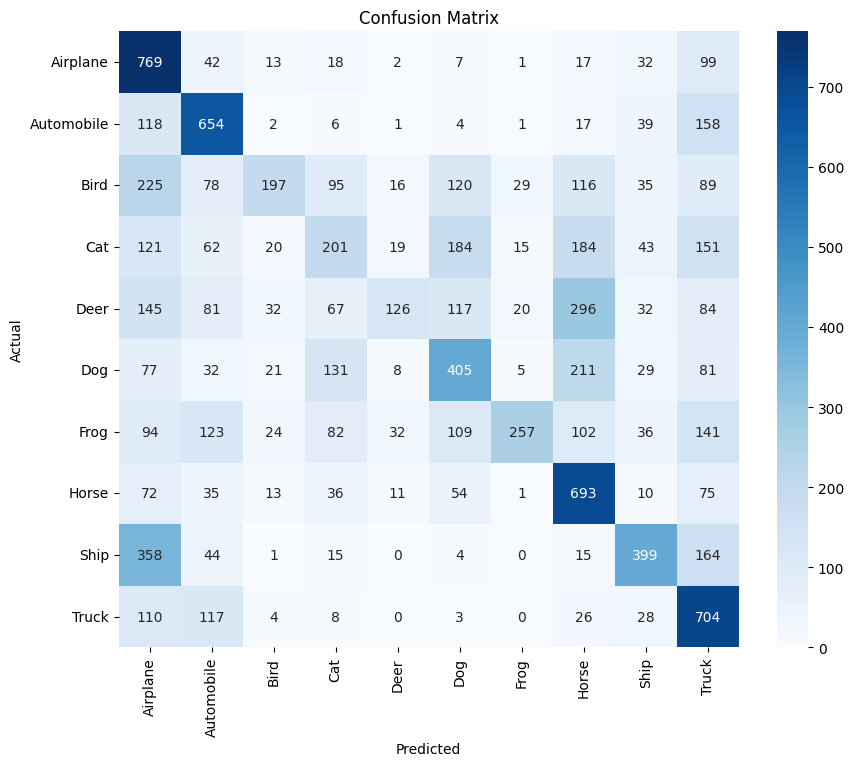

In [ ]:
#b. Classification Report and Confusion Matrix
# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test_1d, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

8. Hyperparameter Tuning

In [ ]:
#To optimize the model's performance, you can experiment with different hyperparameters such as the number of layers, number of neurons, learning rate, batch size, etc. Here's an example of how to adjust the number of epochs and batch size:

# Adjusting epochs and batch size
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 100ms/step - accuracy: 0.8891 - loss: 0.3129 - val_accuracy: 0.6964 - val_loss: 1.1651
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9071 - loss: 0.2703 - val_accuracy: 0.6852 - val_loss: 1.2764
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.9124 - loss: 0.2540 - val_accuracy: 0.6874 - val_loss: 1.2813
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - accuracy: 0.9200 - loss: 0.2350 - val_accuracy: 0.6849 - val_loss: 1.3070
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.9241 - loss: 0.2174 - val_accuracy: 0.6944 - val_loss: 1.3934
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9310 - loss: 0.1981 - val_accuracy: 0.6881 - val_loss: 1.4766
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9368 - loss: 0.1828 - val_accuracy: 0.6859 - val_loss: 1.4986
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9449 - loss: 0.1659 

9. Visualization of Training History

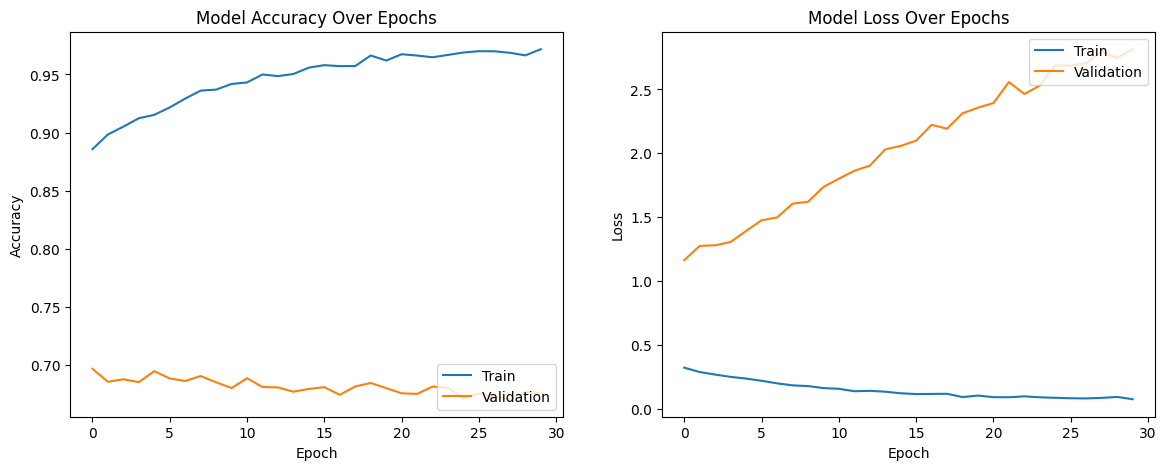

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

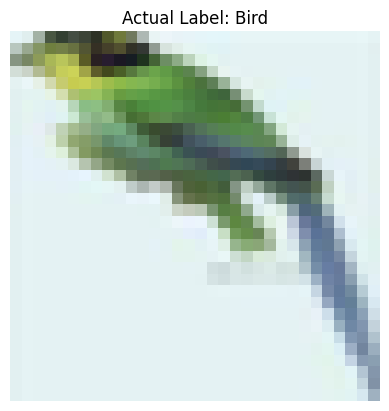

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label: Truck, Accuracy: False


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Find indices of images labeled as 'Bird'
bird_indices = np.where(train_labels == class_names.index('Bird'))[0]

# Select a random index from the bird indices
random_bird_index = np.random.choice(bird_indices)

# Get the image and its label
random_bird_image = train_images[random_bird_index]
random_bird_label = train_labels[random_bird_index][0]

# Visualize the image
plt.imshow(random_bird_image)
plt.title(f"Actual Label: {class_names[random_bird_label]}")
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

# Preprocess the image for prediction
image_for_prediction = random_bird_image / 255.0
image_for_prediction = np.expand_dims(image_for_prediction, axis=0)


prediction = model.predict(image_for_prediction)

predicted_class_index = np.argmax(prediction)

predicted_class_name = class_names[predicted_class_index]

is_correct = predicted_class_index == random_bird_label

print(f"Predicted Label: {predicted_class_name}, Accuracy: {is_correct}")